In [1]:
import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.linspace(0, 2*np.pi, N)
mean = 0
std = 0.06
y = np.sin(x)
y += np.random.normal(mean, std, N)
x = np.transpose(x)
print(x.shape)

#Plotting for visualisation
plt.scatter(x,y)
plt.show()

gamma = 10

(50,)


<Figure size 640x480 with 1 Axes>

In [2]:
def rbf_kernel(x, y, gamma=gamma):
    lel = np.exp(-gamma * np.linalg.norm(x-y)**2)
    return lel

In [3]:
K = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        K[i,j] = rbf_kernel(x[i], x[j], gamma=gamma)

In [4]:
Alp = np.linalg.inv(K + N*1*np.identity(N))@y

In [5]:
print(Alp)

[-0.00174764  0.00574226  0.0039845   0.00754398  0.00752495  0.01119626
  0.01216296  0.01429024  0.01361122  0.01714894  0.01911355  0.0176844
  0.01782781  0.0170541   0.02061412  0.01705745  0.01458748  0.01719545
  0.01238429  0.01323768  0.00934121  0.00712989  0.00573079  0.00158572
  0.00011734  0.00080649 -0.00404415 -0.00573982 -0.00754242 -0.00917578
 -0.01178611 -0.012273   -0.01470854 -0.01672428 -0.01690779 -0.02000643
 -0.0179716  -0.01779409 -0.0180156  -0.01858125 -0.01733172 -0.01497049
 -0.01156681 -0.01431362 -0.00900734 -0.00929864 -0.0058881  -0.00490825
 -0.00363222  0.00043222]


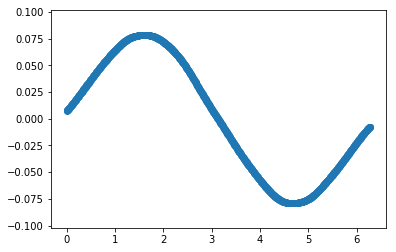

In [6]:
X = np.linspace(0,2*np.pi,1000)

K1 = np.zeros((N))
y1 = np.zeros(1000)

for i in range(len(X)):
    for j in range(N):
        K1[j] = rbf_kernel(X[i], x[j], gamma=gamma)
    y1[i] = np.sum(Alp * K1)
    
plt.scatter(X,y1)
plt.show()0.5

As  we can see here, even though the model is trained on only on 50 points, its able to predict the y- axis values for another 1000 points accurately